In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load datasets
columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","target"]
df = pd.read_csv("creditcard.txt",names=columns)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# Data manipulation with pandas

In [3]:
df.replace("?",np.nan,inplace=True)
df.isna().sum()

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
target     0
dtype: int64

In [4]:
df.dtypes

A1         object
A2         object
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14        object
A15         int64
target     object
dtype: object

In [5]:
df['A2'] = df['A2'].astype('float64')
df['A14'] = df['A3'].astype('float64')
df.dtypes

A1         object
A2        float64
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14       float64
A15         int64
target     object
dtype: object

# splitting dataset

In [6]:
from sklearn.model_selection import train_test_split
# before splitting the data, lets choose any one feature as X
X = df.iloc[:,:-1]
y = df.target

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
49,b,23.92,0.665,u,g,c,v,0.165,f,f,0,f,g,0.665,0
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,7.000,2
245,b,33.17,3.040,y,p,c,h,2.040,t,t,1,t,g,3.040,18027
600,a,29.50,0.460,u,g,k,v,0.540,t,t,4,f,g,0.460,500
313,a,18.58,10.000,u,g,d,v,0.415,f,f,0,f,g,10.000,42


# Feature enginerring with pipeline

In [16]:
# pipeline is to create a sequence of preprocessing action
from sklearn.pipeline import Pipeline

#Simple Imputer handanles missing values
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [17]:
#separate the categorical and numerical columns
#Numeric coluns
numeric_cols=X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

categoriacal_cols=X.select_dtypes(include=['object']).columns
print(categoriacal_cols)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')
Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object')


In [18]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps=
                         [
                             ('imputeN',SimpleImputer(strategy='mean')),
                             ('scale',StandardScaler())
                         ])

In [19]:
#Building the numeric Transformation Pipeline
c_transformer = Pipeline(steps=
                         [
                             ('imputeC',SimpleImputer(strategy='constant',fill_value='missing')),
                             ('onehot',OneHotEncoder(handle_unknown='ignore'))
                         ])

In [22]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                                  [
                                      ('numeric',n_transformer,numeric_cols),
                                      ('categoric',c_transformer,categoriacal_cols)
                                  ])

In [25]:
#create estimator
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')

In [26]:
# add estimator to pipeline
mymodel = Pipeline(steps=
                   [
                       ('pre',preprocessing),
                       ('est',estimator)
                   ])

In [27]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object'))])),
                ('est',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3,
                                      weights='distance'))])

# Validation and Evalution 

In [30]:
# Import all the metics for validation and evalution
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns

In [32]:
# find y_hat for your test data
y_hat = mymodel.predict(X_test)

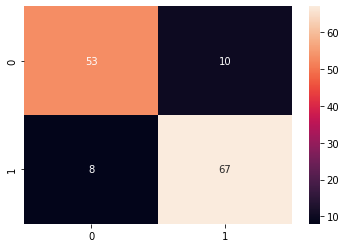

In [33]:
# confusion matrix
sns.heatmap(confusion_matrix(y_hat,y_test),annot=True)
plt.show()

In [34]:
#Summarise the fit of the nodel
report = classification_report(y_test, y_hat)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           +       0.84      0.87      0.85        61
           -       0.89      0.87      0.88        77

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



In [35]:
# make prediction for unknown sample
sample = X_test.iloc[0:1,:]
sample

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
317,b,17.5,22.0,l,gg,ff,o,0.0,f,f,0,t,p,22.0,100000


In [36]:
mymodel.predict(sample)[0]

'+'

# saving machine learning model

In [37]:
import pickle
#save model
pickle.dump(mymodel,open("mymodel.pkl","wb"))

In [39]:
#load model
model = pickle.load(open("mymodel.pkl","rb"))

In [40]:
model.score(X_test,y_test)

0.8695652173913043